<a href="https://colab.research.google.com/github/hlee282/AI4ALL_2024_hlee282/blob/main/AI4ALL_2024_hlee282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [2]:
# Connect Anvil to Google Colab
import anvil.server
anvil.server.connect("server_GJI3NERDBG5UORLILFXFITI3-KVTLVK7Z2BPPWMJU")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
# Read dataset and shows all columns
original_df = pd.read_csv('drive/My Drive/finaldatabse.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# There are 5 rows for the same song named "adan y eva." So this dataset has duplicate songs.
original_df.head()

<ipython-input-5-db0fa85ed269>:2: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv('drive/My Drive/finaldatabse.csv')


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

In [6]:
# Drop duplicate song names.
original_df.drop_duplicates(subset = ['Title'], inplace = True)

# Drop any rows with no song names
original_df.dropna(subset = ['Title'])
original_df.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
16,Global,https://open.spotify.com/track/5xhJmd0I15jFcEd...,418.00,it wont kill ya,The Chainsmokers - Louane,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,7,12,0.572,0.53,6,-8.521,0,0.0654,0.0647,0.000169,0.127,0.12,170.138,217613,4,pop,1314.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0,-7.0,-3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,4.0,1.0,274.0,0.000000,0.003650,0.0,0.00365,0.00365,0.007299,0.000000,0.003650,0.014599,0.003650,0.000000,0.166667,0.0,0.166667,0.166667,0.333333,0.000000,0.166667,0.8,0.2,0.0,0.0,-1.0,1.0,0.0,0.0,Desire,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,0.0,0.0,global
39,Global,https://open.spotify.com/track/0wJJhRgdHhT93Z3...,56.00,hymn,Kesha,single,dance pop,5910376.0,True,Hymn,2017-08-03,1,1,0.488,0.538,6,-4.974,1,0.076,0.147,0.0,0.305,0.38,67.037,205600,4,pop,1199.0,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,0.0,0.0,global
58,Global,https://open.spotify.com/track/6JSryEdVJTZq6YB...,78.40,arrows,Foo Fighters,album,alternative metal,8092392.0,False,Concrete and Gold,2017-09-15,7,11,0.515,0.917,1,-7.312,1,0.0417,0.000209,0.000476,0.145,0.409,121.988,266187,4,metal,1156.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,0.0,0.0,global
80,Global,https://open.spotify.com/t

In [7]:
# Call only the features we care for
original_df_features = original_df.iloc[:, [3,4,5,6,13,14,22,74,75,76,77,78,79,80,81,82,83,150]]

# Original dtype of valence, danceability, and energy was object. Had parse strings. Converted to float64. Nonnumeric values are converted to NaN
original_df_features[['valence','danceability','energy']] = original_df_features[['valence','danceability','energy']].apply(pd.to_numeric, errors = 'coerce')

# Fill NaN with mean values. Found out that removing the songs that had NaN values in the columns in original_df_features reduced to the amount of songs to 6120 which would be too small.
mean = original_df_features.mean(axis = 0, skipna = True, numeric_only = True)
woNaN = original_df_features.fillna(value = mean, inplace = False)

# Check dtypes for emotional features is float64.
woNaN.dtypes

<ipython-input-7-1fd91ff23a17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_features[['valence','danceability','energy']] = original_df_features[['valence','danceability','energy']].apply(pd.to_numeric, errors = 'coerce')


Title                 object
Artist                object
Album/Single          object
Genre                 object
danceability         float64
energy               float64
valence              float64
anger_norm           float64
anticipation_norm    float64
disgust_norm         float64
fear_norm            float64
joy_norm             float64
sadness_norm         float64
surprise_norm        float64
trust_norm           float64
negative_norm        float64
positive_norm        float64
Cluster               object
dtype: object

In [8]:
# 47045 unique songs
woNaN.shape[0]
print("Count of Unique Songs:", woNaN.shape[0])

Count of Unique Songs: 47045


In [9]:
# Exclude non-numeric columns.
features = ['danceability', 'energy', 'valence', 'anger_norm','joy_norm', 'sadness_norm','anticipation_norm', 'disgust_norm', 'surprise_norm']

emot_feat = woNaN[features]
emot_feat.head()

,danceability,energy,valence,anger_norm,joy_norm,sadness_norm,anticipation_norm,disgust_norm,surprise_norm
0,0.767,0.709,0.720,0.008976,0.011029,0.009590,0.010794,0.006237,0.006355
16,0.572,0.530,0.120,0.000000,0.003650,0.007299,0.003650,0.000000,0.000000
39,0.488,0.538,0.380,0.008976,0.011029,0.009590,0.010794,0.006237,0.006355
58,0.515,0.917,0.409,0.008976,0.011029,0.009590,0.010794,0.006237,0.006355
80,0.593,0.712,0.473,0.003937,0.000000,0.007874,0.003937,0.000000,0.003937


In [10]:
# Min-Max norm features
emot_norm0 = emot_feat[['anger_norm', 'joy_norm', 'sadness_norm', 'anticipation_norm', 'disgust_norm', 'surprise_norm']]
emot_norm1 = (emot_norm0-emot_norm0.min())/(emot_norm0.max()-emot_norm0.min())

emot_norm1.head()

,anger_norm,joy_norm,sadness_norm,anticipation_norm,disgust_norm,surprise_norm
0,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264
16,0.000000,0.029197,0.075426,0.027372,0.00000,0.000000
39,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264
58,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264
80,0.077953,0.000000,0.081365,0.029528,0.00000,0.085039


In [11]:
# Merge back together with Min-Max data
emot_dev = emot_feat[['danceability', 'energy', 'valence']]
emot_norm = pd.concat([emot_dev, emot_norm1], axis = 1)
emot_norm.head()

,danceability,energy,valence,anger_norm,joy_norm,sadness_norm,anticipation_norm,disgust_norm,surprise_norm
0,0.767,0.709,0.720,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264
16,0.572,0.530,0.120,0.000000,0.029197,0.075426,0.027372,0.00000,0.000000
39,0.488,0.538,0.380,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264
58,0.515,0.917,0.409,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264
80,0.593,0.712,0.473,0.077953,0.000000,0.081365,0.029528,0.00000,0.085039


                   danceability    energy   valence  anger_norm  joy_norm  \
danceability           1.000000  0.189653  0.363949    0.044770 -0.040579   
energy                 0.189653  1.000000  0.397002   -0.007108 -0.035116   
valence                0.363949  0.397002  1.000000   -0.019899  0.000926   
anger_norm             0.044770 -0.007108 -0.019899    1.000000  0.104957   
joy_norm              -0.040579 -0.035116  0.000926    0.104957  1.000000   
sadness_norm          -0.027265 -0.010331 -0.025742    0.551509  0.182910   
anticipation_norm     -0.025064 -0.022700 -0.001152    0.187348  0.644187   
disgust_norm           0.035236 -0.010135 -0.016344    0.685530  0.111395   
surprise_norm         -0.008187 -0.013466 -0.003073    0.301620  0.504517   

                   sadness_norm  anticipation_norm  disgust_norm  \
danceability          -0.027265          -0.025064      0.035236   
energy                -0.010331          -0.022700     -0.010135   
valence               -0.

<Axes: >

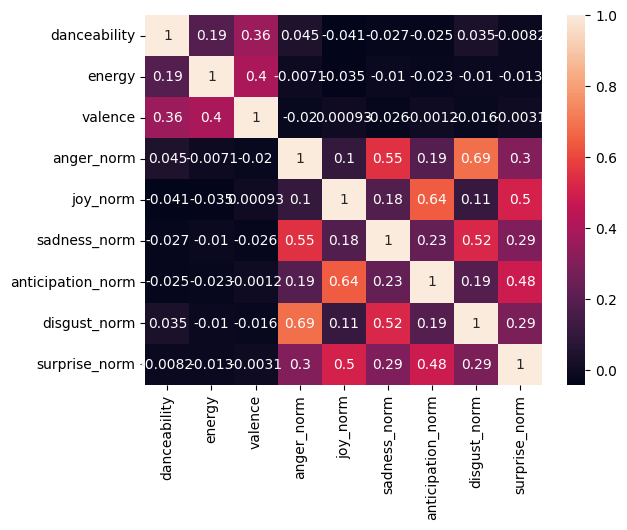

In [12]:
# Correlation Matrix
correl_matrix = emot_norm.loc[:,features].corr()
print(correl_matrix)
sns.heatmap(correl_matrix, annot=True)


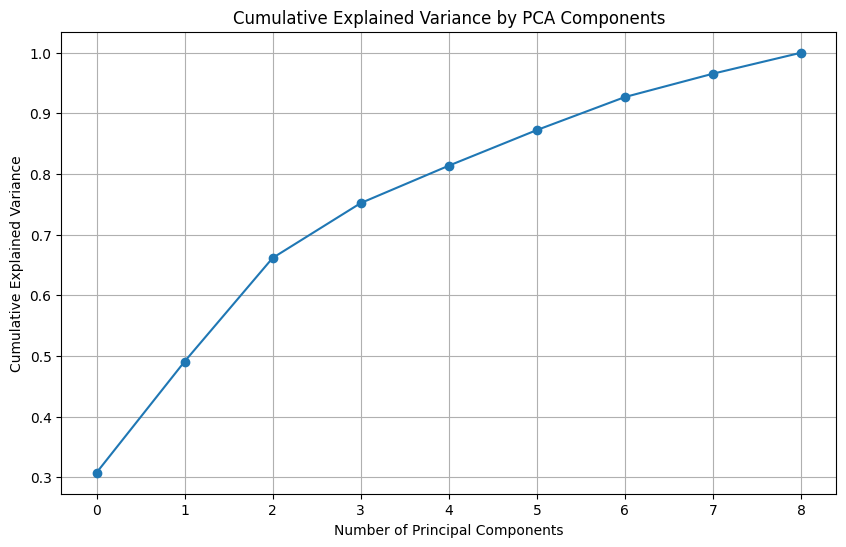

In [13]:
# Looking at Number of PCA Components vs. Cumulative Variance
scaler = StandardScaler()
emot_feat_std = scaler.fit_transform(emot_norm)
pca = PCA()
pca.fit(emot_feat_std)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)


In [14]:
# Applying PCA with 3 components
pca = PCA(3)
pca.fit(emot_feat_std)
scores_pca = pca.transform(emot_feat_std)
scores_pca

array([[-0.04205117, -1.15218325,  0.33750493],
       [-6.34261204,  1.84872806, -1.01775923],
       [ 0.04273095,  1.25019732, -0.32325241],
       ...,
       [ 0.11859862,  2.87454207, -0.79427265],
       [ 0.08633691,  2.26387866, -0.57264003],
       [-0.01211971, -0.49274971,  0.13894989]])

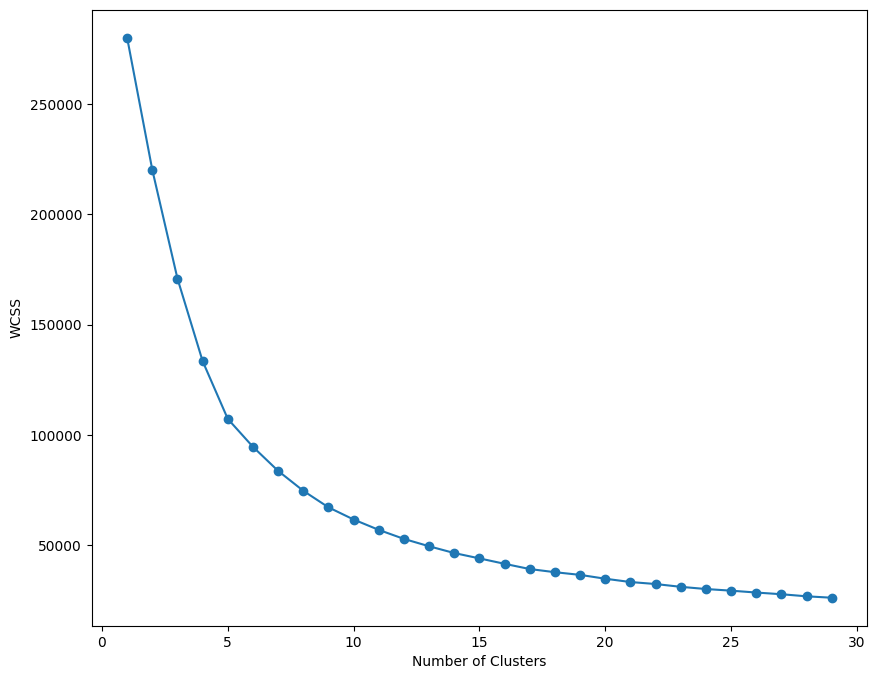

In [15]:
# Determining number of clusters with elbow method
clustersumsq = []
for x in range(1,30):
  pca_kmeans = KMeans(n_clusters = x, init = 'k-means++', n_init = 10, random_state = None)
  pca_kmeans.fit(scores_pca)
  clustersumsq.append(pca_kmeans.inertia_)

plt.figure(figsize = (10,8))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(1,30), clustersumsq, marker = 'o', linestyle = "-")
plt.show()


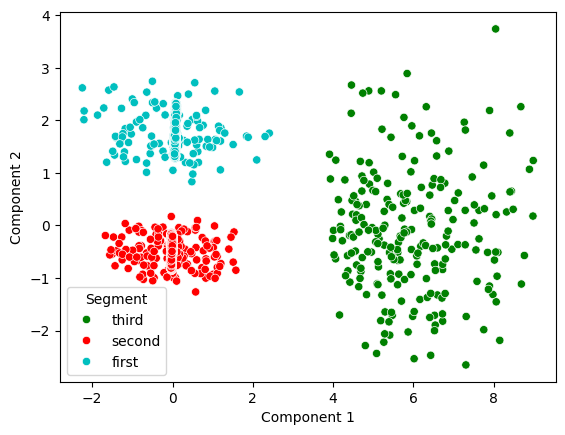

In [16]:
# Using 3 clusters.
# Setting random_state to integer 4 to stop cluster randomization on each run session.
kmeans_pca = KMeans(n_clusters = x, init = 'k-means++', n_init = 20, random_state = 4)
kmeans_pca.fit(scores_pca)
df_segm_pca_kmeans = pd.concat([emot_norm.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2:'third'})

#Components
Component_1 = df_segm_pca_kmeans['Component 1']
Component_2 = df_segm_pca_kmeans['Component 2']

# Plotting
sns.scatterplot(data = df_segm_pca_kmeans, x = Component_1, y = Component_2, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c'] )
plt.show()


In [17]:
#df_segm_pca_kmeans['Segment'].value_counts()
df_segm_pca_kmeans.shape[0]

47045

In [18]:
cluster_avg = df_segm_pca_kmeans.groupby('Segment')[['valence', 'energy']].mean().reset_index()
cluster_avg.head()

#Segment 'first': Lowest Valence + Lowest Energy => (Sad)
#Segment 'second': Highest valence + Highest energy => (Happy)
#Segment 'third': Second Highest Valence + Second Highest Energy => (Angry)

,Segment,valence,energy
0,first,0.263050,0.451322
1,second,0.567935,0.694028
2,third,0.438229,0.623891


<Axes: xlabel='Segment'>

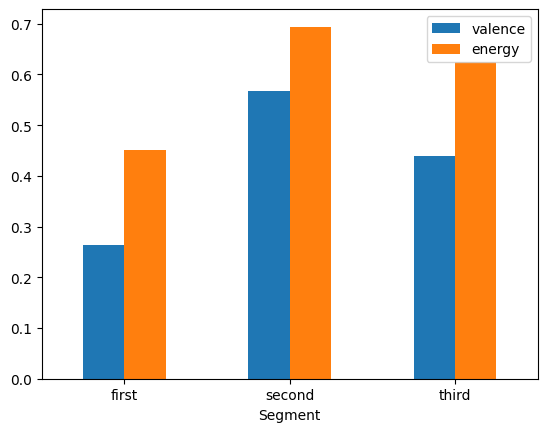

In [19]:
# Visualization of valence and energy for each cluster
cluster_avg.plot.bar(x = 'Segment', rot = 0)

In [20]:
# Insert new column "emotions" into data
df_segm_pca_kmeans.insert(13, 'emotions', True)

In [21]:
# Insert Sad, Happy, or Angry in column 'emotions' depending on cluster. Redefine index starting from 0 and increasing by 1.
df_segm_pca_kmeans['emotions'] = np.where(df_segm_pca_kmeans['Segment'] == 'first', 'Sad', df_segm_pca_kmeans['emotions'])
df_segm_pca_kmeans['emotions'] = np.where(df_segm_pca_kmeans['Segment'] == 'second', 'Happy', df_segm_pca_kmeans['emotions'])
df_segm_pca_kmeans['emotions'] = np.where(df_segm_pca_kmeans['Segment'] == 'third', 'Angry', df_segm_pca_kmeans['emotions'])
df_segm_pca_kmeans.reset_index()
print(df_segm_pca_kmeans.shape[0])
df_segm_pca_kmeans.head()

47045


,danceability,energy,valence,anger_norm,joy_norm,sadness_norm,anticipation_norm,disgust_norm,surprise_norm,Component 1,Component 2,Component 3,Segment K-means PCA,emotions,Segment
0,0.767,0.709,0.720,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264,-0.042051,-1.152183,0.337505,6,True,NaN
1,0.572,0.530,0.120,0.000000,0.029197,0.075426,0.027372,0.00000,0.000000,-6.342612,1.848728,-1.017759,3,True,NaN
2,0.488,0.538,0.380,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264,0.042731,1.250197,-0.323252,11,True,NaN
3,0.515,0.917,0.409,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264,-0.023194,-0.048497,0.052623,25,True,NaN
4,0.593,0.712,0.473,0.077953,0.000000,0.081365,0.029528,0.00000,0.085039,-5.209030,-0.010790,-1.203919,3,True,NaN


In [22]:
# Redefine index in song_info to start from 0 and increasing by 1.
song_info = woNaN[['Title','Artist','Genre', 'Album/Single']]
song_info = song_info.reset_index()
print(song_info.shape[0])
song_info.head()


47045


,index,Title,Artist,Genre,Album/Single
0,0,adan y eva,Paulo Londra,argentine hip hop,single
1,16,it wont kill ya,The Chainsmokers - Louane,dance pop,album
2,39,hymn,Kesha,dance pop,single
3,58,arrows,Foo Fighters,alternative metal,album
4,80,talking to myself,Linkin Park,alternative metal,album


In [23]:
# Merge the two dataframes to combine song info and emotion data.
new_df = pd.concat([song_info, df_segm_pca_kmeans], axis = 1)
print(new_df.shape[0])
new_df.head()


47045


,index,Title,Artist,Genre,Album/Single,danceability,energy,valence,anger_norm,joy_norm,sadness_norm,anticipation_norm,disgust_norm,surprise_norm,Component 1,Component 2,Component 3,Segment K-means PCA,emotions,Segment
0,0,adan y eva,Paulo Londra,argentine hip hop,single,0.767,0.709,0.720,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264,-0.042051,-1.152183,0.337505,6,True,NaN
1,16,it wont kill ya,The Chainsmokers - Louane,dance pop,album,0.572,0.530,0.120,0.000000,0.029197,0.075426,0.027372,0.00000,0.000000,-6.342612,1.848728,-1.017759,3,True,NaN
2,39,hymn,Kesha,dance pop,single,0.488,0.538,0.380,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264,0.042731,1.250197,-0.323252,11,True,NaN
3,58,arrows,Foo Fighters,alternative metal,album,0.515,0.917,0.409,0.177730,0.088235,0.099100,0.080958,0.05821,0.137264,-0.023194,-0.048497,0.052623,25,True,NaN
4,80,talking to myself,Linkin Park,alternative metal,album,0.593,0.712,0.473,0.077953,0.000000,0.081365,0.029528,0.00000,0.085039,-5.209030,-0.010790,-1.203919,3,True,NaN


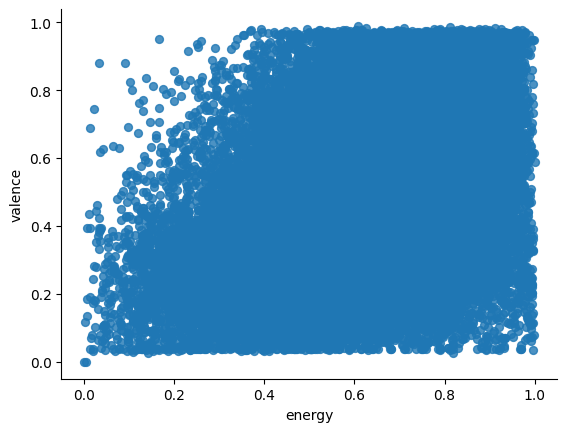

In [24]:
# @title energy vs valence
from matplotlib import pyplot as plt
new_df.plot(kind='scatter', x='energy', y='valence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: title={'center': 'Number of Songs in Each Genre in Happy Category'}, xlabel='Number of Happy Songs', ylabel='Genre'>

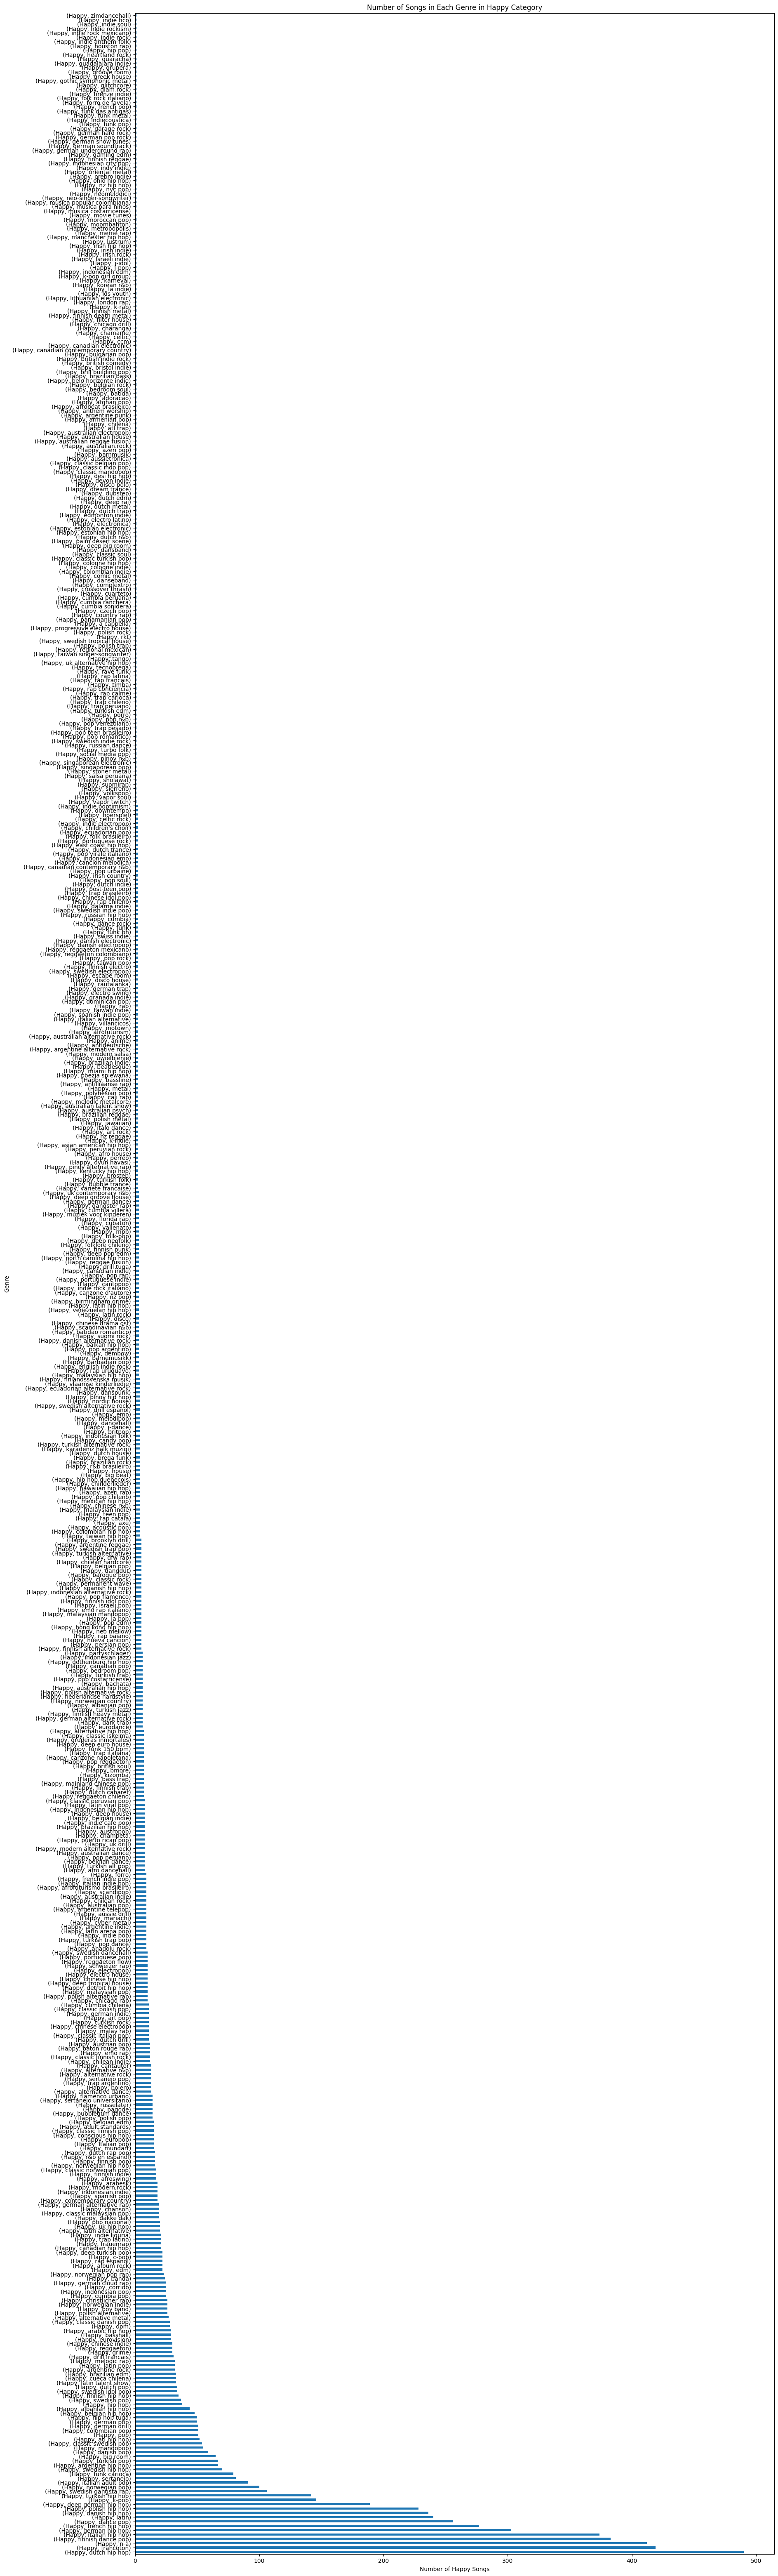

In [28]:
# Number of songs in each genre associated with emotion 'Happy'
plt.figure(figsize=(20,80))
new_df1 = new_df.drop(new_df[new_df['emotions'] == 'True'].index)
new_df2 = new_df1[new_df1['emotions'].str.contains('Happy')]
new_df1.value_counts(subset = [new_df2['emotions'], 'Genre']).plot(xlabel = 'Number of Happy Songs', ylabel = 'Genre', kind = 'barh', title = 'Number of Songs in Each Genre in Happy Category')


In [25]:
# Basic function that takes the emotion_input as an input and outputs 5 random songs associated with the emotion given in input.
# Output has Title, Artist, Genre, emotions, valence, & energy data.
# The choices for emotion are Happy, Sad, and Angry.

#Call into Anvil
@anvil.server.callable
def musicrec2(emotion_input):
      if emotion_input == "Happy":
        happy = ['Happy']
        happy_songs = new_df['emotions'].isin(happy)
        happy_songs_df = new_df[happy_songs]
        two_songs1 = happy_songs_df.sample(5)
        song_recs1 = two_songs1[['Title', 'Artist', 'Genre', 'emotions', 'valence', 'energy']]
        return song_recs1.to_markdown()
      if emotion_input == "Sad":
        sad = ['Sad']
        sad_songs = new_df['emotions'].isin(sad)
        sad_songs_df = new_df[sad_songs]
        two_songs2 = sad_songs_df.sample(5)
        song_recs2 = two_songs2[['Title', 'Artist', 'Genre', 'emotions', 'valence', 'energy']]
        return song_recs2.to_markdown()
      if emotion_input == "Angry":
        angry = ['Angry']
        angry_songs = new_df['emotions'].isin(angry)
        angry_songs_df = new_df[angry_songs]
        two_songs3 = angry_songs_df.sample(5)
        song_recs3 = two_songs3[['Title', 'Artist', 'Genre', 'emotions', 'valence', 'energy']]
        return song_recs3.to_markdown()








In [26]:
anvil.server.wait_forever()


KeyboardInterrupt: 